# Customer Churn Predictive model
Customer churn, the loss of customers over time, is a critical metric affecting business profitability. This predictive model aims to forecast customer churn based on historical data, enabling the implementation of targeted retention efforts.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

In [50]:
dataset=pd.read_csv('customer_churn.csv')
dataset.drop(columns=['Names','Company','Location'],axis=1,inplace=True)
dataset.dtypes

Age                float64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites          float64
Onboard_date        object
Churn                int64
dtype: object

In [51]:
dataset.isnull().sum()

Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Churn              0
dtype: int64

# Data Visualization

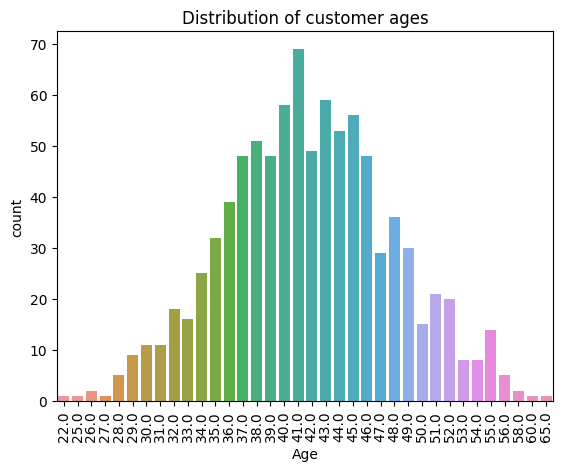

In [61]:
sns.countplot(dataset,x='Age')
plt.title('Distribution of customer ages')
plt.xticks(rotation=90)
plt.show()

The age distribution of customers is typically skewed, with the majority falling in their mid thirties and forties. This trend may be attributed to the product being most commonly sought after within that age group.

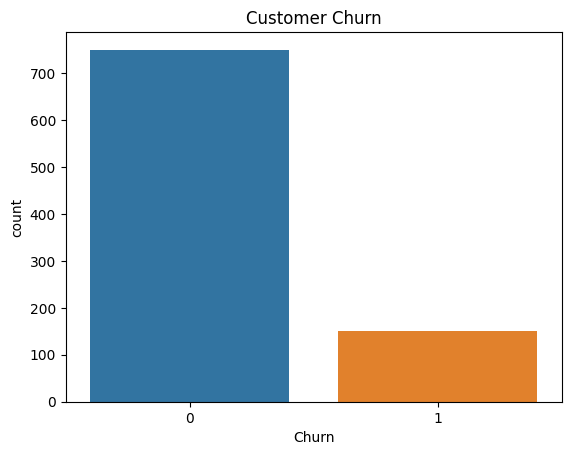

In [63]:
sns.countplot(dataset,x='Churn')
plt.title('Customer Churn')
plt.show()

Generally, we tend to retain most customers in the long run, which may be attributed to excellent service delivery. However, there is also room for improvement.

## predictive model

In [64]:
dataset.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Churn
0,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,1
1,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,1
2,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,1
3,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,1
4,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,1


In [65]:
x=dataset.drop(columns=['Churn','Onboard_date'],axis=1)
y=dataset['Churn']

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,shuffle=True)

In [109]:
from sklearn.preprocessing import MinMaxScaler
str_x=MinMaxScaler()
x_train=str_x.fit_transform(x_train)
x_test=str_x.transform(x_test)

In [110]:
import tensorflow as tf
import keras
from tensorflow.keras import models,Sequential

In [111]:
model=models.Sequential([
    keras.layers.Dense(128,input_dim=x_train.shape[1],activation='relu'),
     keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation='relu'),
     keras.layers.Dropout(0.2),
    keras.layers.Dense(16,activation='relu'),
     keras.layers.Dropout(0.2),
    keras.layers.Dense(8,activation='relu'),
     keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid')
])

In [118]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=64,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
11/11 [==============================] - 2s 21ms/step - loss: 0.2370 - accuracy: 0.9067 - val_loss: 0.4923 - val_accuracy: 0.9244
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 0.2274 - accuracy: 0.8948 - val_loss: 0.5140 - val_accuracy: 0.9156
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 0.2250 - accuracy: 0.9022 - val_loss: 0.5116 - val_accuracy: 0.9200
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 0.2274 - accuracy: 0.9067 - val_loss: 0.5102 - val_accuracy: 0.9156
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.2131 - accuracy: 0.9126 - val_loss: 0.5055 - val_accuracy: 0.9111
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 0.2251 - accuracy: 0.9052 - val_loss: 0.5046 - val_accuracy: 0.9022
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 0.2239 - accuracy: 0.9081 - val_loss: 0.5344 - val_accuracy: 0.9111
Epoch 8/100

Epoch 59/100
11/11 [==============================] - 0s 8ms/step - loss: 0.2193 - accuracy: 0.9052 - val_loss: 0.6999 - val_accuracy: 0.9067
Epoch 60/100
11/11 [==============================] - 0s 9ms/step - loss: 0.2176 - accuracy: 0.8993 - val_loss: 0.5807 - val_accuracy: 0.8978
Epoch 61/100
11/11 [==============================] - 0s 9ms/step - loss: 0.2271 - accuracy: 0.9022 - val_loss: 0.5641 - val_accuracy: 0.9156
Epoch 62/100
11/11 [==============================] - 0s 9ms/step - loss: 0.2063 - accuracy: 0.9037 - val_loss: 0.6129 - val_accuracy: 0.9111
Epoch 63/100
11/11 [==============================] - 0s 13ms/step - loss: 0.2100 - accuracy: 0.9081 - val_loss: 0.6510 - val_accuracy: 0.9022
Epoch 64/100
11/11 [==============================] - 0s 13ms/step - loss: 0.2150 - accuracy: 0.9067 - val_loss: 0.6466 - val_accuracy: 0.9111
Epoch 65/100
11/11 [==============================] - 0s 11ms/step - loss: 0.1987 - accuracy: 0.9081 - val_loss: 0.6147 - val_accuracy: 0.9111
Epo

Text(0.5, 1.0, 'Accuracy Plot')

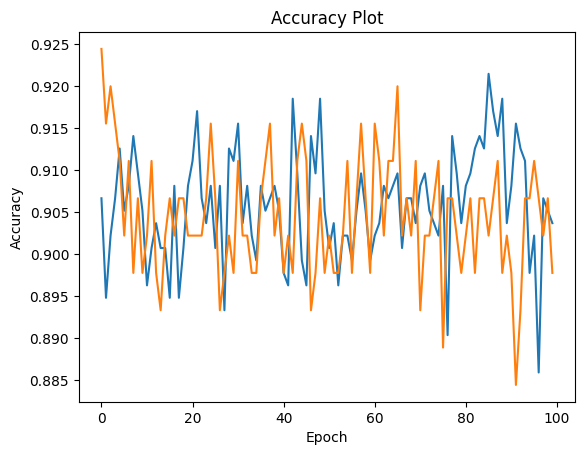

In [121]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy Plot')

In [127]:
y_pred=model.predict(x_test)
threshold = 0.5
y_pred=np.where(y_pred >= threshold,1,0)
model.evaluate(x_test,y_test)


8/8 [==============================] - 0s 3ms/step - loss: 0.7591 - accuracy: 0.8978


[0.7590584754943848, 0.897777795791626]

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       194
           1       0.64      0.58      0.61        31

    accuracy                           0.90       225
   macro avg       0.79      0.76      0.78       225
weighted avg       0.89      0.90      0.90       225

